In [699]:
# Primero, importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [700]:
# Cargar los datos
df = pd.read_excel("/content/tfg.xlsx")

In [701]:
# Ver primeras filas y estructura de los datos
print("Primeras filas del dataset:")
print(df.head())
print("\nResumen estadístico:")
print(df.describe())
print("\nInformación general del dataset:")
print(df.info())

Primeras filas del dataset:
  trimestres     españa  turismo_internacional  exportaciones  importaciones  \
0     2000T1  177400000           2.146650e+09    31196000000   4.247050e+10   
1     2000T2  160232000           3.828565e+09    32608000000   4.226475e+10   
2     2000T3  163227000           5.074554e+09    31196000000   4.226475e+10   
3     2000T4  166992000           8.040250e+09    29784000000   4.205900e+10   
4     2001T1  170735000           2.283348e+09    32500000000   4.300000e+10   

   tasa_actividad         ipi  precio_petroleo  deuda_publica  
0            53.1  591.285333         31.94000   362694000000  
1            53.4  590.065333         29.75000   365743000000  
2            53.9  567.984667         28.45000   369100000000  
3            54.0  566.296667         31.22203   374557000000  
4            53.1  582.329333         28.66000   372830000000  

Resumen estadístico:
             españa  turismo_internacional  exportaciones  importaciones  \
count  9.

In [702]:
#Ya que no hay nulos, comenzamos con el siguiente tratamiento

In [703]:
#En primer lugar para facilitar la visualización, vamos a dividir las columnas que están en euros, entre un millón.
df[['españa', 'turismo_internacional', 'exportaciones', 'importaciones','deuda_publica' ]] = df[['españa', 'turismo_internacional', 'exportaciones', 'importaciones','deuda_publica' ]].div(1000000)

In [704]:
print("\nResumen estadístico:")
print(df.describe())
print("\nInformación general del dataset:")
print(df.info())


Resumen estadístico:
           españa  turismo_internacional  exportaciones  importaciones  \
count   99.000000              99.000000      99.000000      99.000000   
mean   265.701646            5124.698845   57754.155556   69635.727273   
std     51.785719            2684.554937   20216.515726   19401.871162   
min    160.232000              44.630000   29784.000000   42059.000000   
25%    244.367500            3316.330566   39500.000000   56562.100000   
50%    267.355000            4480.097379   58000.000000   67550.300000   
75%    292.355500            6221.331667   70500.000000   77979.250000   
max    399.067000           14504.196667  104840.000000  121000.000000   

       tasa_actividad         ipi  precio_petroleo  deuda_publica  
count       99.000000   99.000000        99.000000   9.900000e+01  
mean        58.339394  469.412734        47.570063   8.540005e+05  
std          2.000035   78.426906        19.764609   4.353001e+05  
min         52.700000  341.132667      

In [705]:
#Para la tendencia, teniendo en cuenta que trabajamos con tasas (50.95, por ejemplo, vamos a intentar poner las variables mas grandes en la misma escala para visualizarlo en un mismo gráfico)
# Dividir las columnas especificadas
df['ipi'] = df['ipi'] / 10
df['españa'] = df['españa'] / 10
df['turismo_internacional'] = df['turismo_internacional'] / 100
df['exportaciones'] = df['exportaciones'] / 1000
df['importaciones'] = df['importaciones'] / 1000
df['deuda_publica']=df['deuda_publica']/10000

# Redondear los valores a 2 decimales
df = df.round({'ipi': 2, 'españa': 2, 'turismo_internacional': 2, 'exportaciones': 2, 'deficit_público': 2, 'importaciones': 2})

df.head()

,trimestres,españa,turismo_internacional,exportaciones,importaciones,tasa_actividad,ipi,precio_petroleo,deuda_publica
0,2000T1,17.74,21.47,31.20,42.47,53.1,59.13,31.94000,36.2694
1,2000T2,16.02,38.29,32.61,42.26,53.4,59.01,29.75000,36.5743
2,2000T3,16.32,50.75,31.20,42.26,53.9,56.80,28.45000,36.9100
3,2000T4,16.70,80.40,29.78,42.06,54.0,56.63,31.22203,37.4557
4,2001T1,17.07,22.83,32.50,43.00,53.1,58.23,28.66000,37.2830


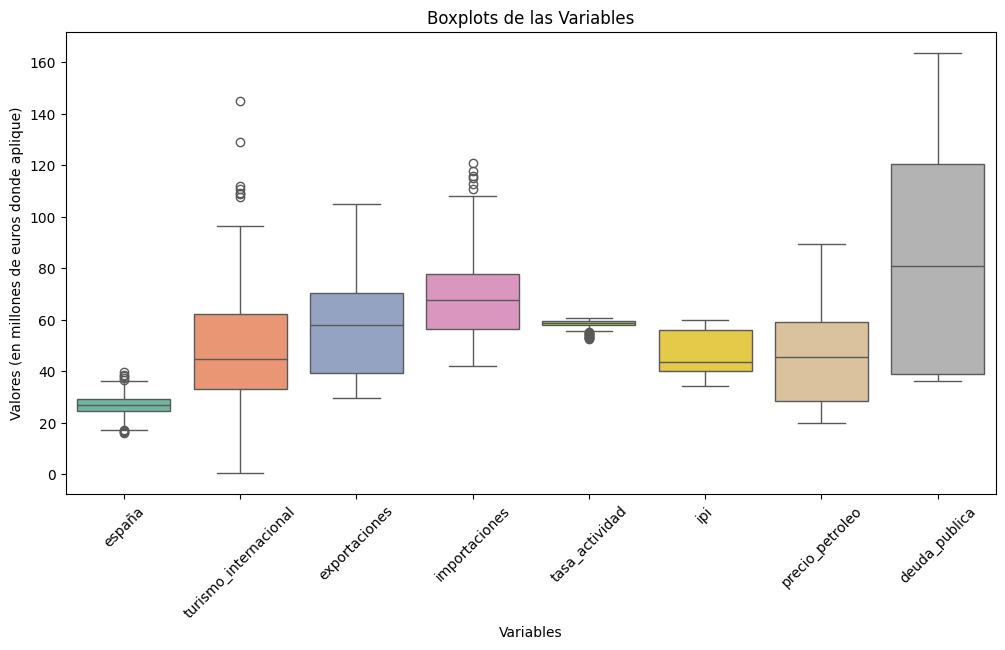

In [706]:

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el boxplot con todas las variables numéricas en el mismo gráfico
sns.boxplot(data=df, orient="v", palette="Set2")

# Ajustar etiquetas y título
plt.xticks(rotation=45)  # Rotar nombres de variables si son muchas
plt.title("Boxplots de las Variables")
plt.ylabel("Valores (en millones de euros donde aplique)")
plt.xlabel("Variables")

# Mostrar el gráfico
plt.show()


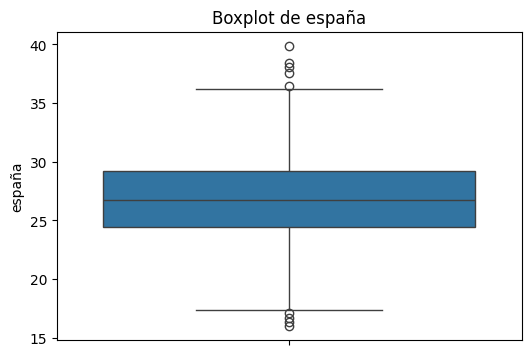

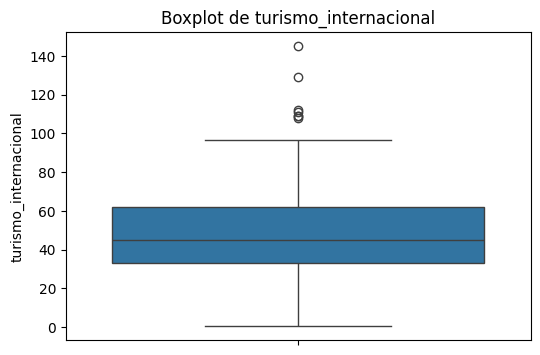

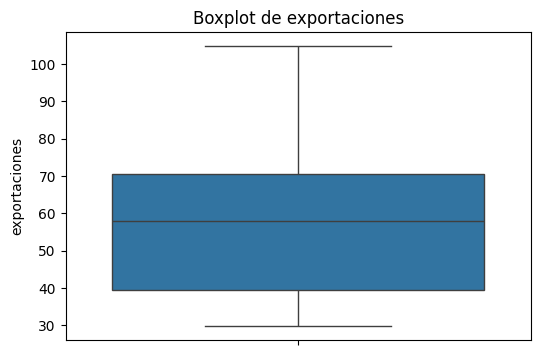

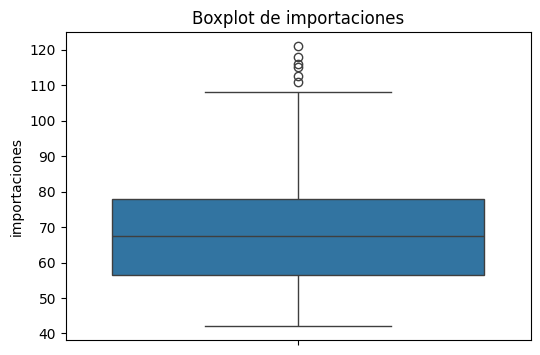

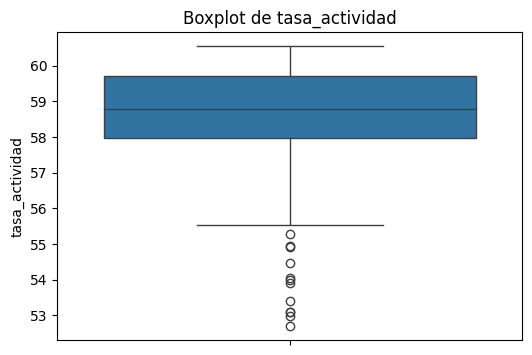

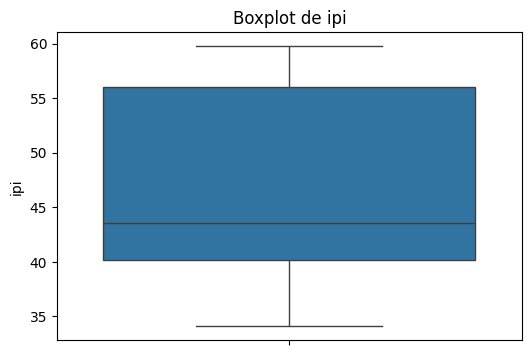

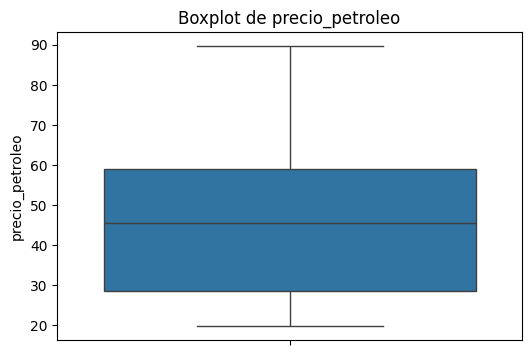

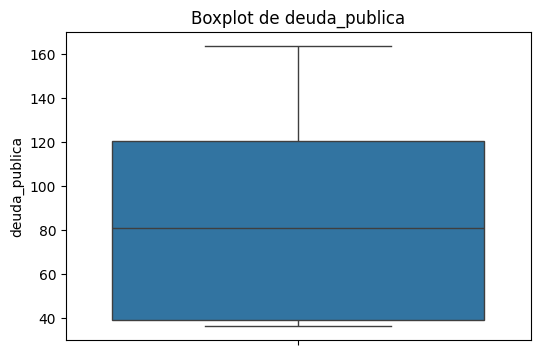

In [707]:
# Boxplots separados por variable
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot de {column}")
    plt.show()


In [708]:
# Identificación de outliers usando el método IQR
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["trimestres"])
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nNúmero de outliers por variable:")
print(outliers.sum())


Número de outliers por variable:
deuda_publica             0
españa                    9
exportaciones             0
importaciones             6
ipi                       0
precio_petroleo           0
tasa_actividad           12
turismo_internacional     7
dtype: int64


In [709]:
# Definir la función para reemplazar outliers
def reemplazar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1

    # Cálculo de los umbrales de outliers
    threshold_upper = q3 + 1.5 * iqr  # Umbral superior
    threshold_lower = q1 - 1.5 * iqr  # Umbral inferior

    # Reemplazar outliers con los valores adecuados
    df[columna] = df[columna].apply(
        lambda x: q3 if x > threshold_upper else (q1 if x < threshold_lower else x)
    )

    return df

In [710]:
# Aplicar la función correctamente
columnas_a_corregir = ['españa', 'importaciones', 'turismo_internacional', 'tasa_actividad']
for col in columnas_a_corregir:
    df = reemplazar_outliers(df, col)

# Mostrar los resultados después de la sustitución
print(df.describe())


          españa  turismo_internacional  exportaciones  importaciones  \
count  99.000000              99.000000      99.000000      99.000000   
mean   26.442576              47.335707      57.754343      67.356970   
std     4.049462              19.689509      20.216420      15.670913   
min    17.330000               0.450000      29.780000      42.060000   
25%    24.472500              33.165000      39.500000      56.560000   
50%    26.740000              44.800000      58.000000      67.550000   
75%    29.182500              61.767500      70.500000      77.970000   
max    36.170000              96.400000     104.840000     108.000000   

       tasa_actividad        ipi  precio_petroleo  deuda_publica  
count       99.000000  99.000000        99.000000      99.000000  
mean        58.831919  46.941717        47.570063      85.400047  
std          1.132227   7.842944        19.764609      43.530010  
min         55.540000  34.110000        19.800000      36.269400  
25%    

In [711]:
# Verifica los cambios
df.head()

,trimestres,españa,turismo_internacional,exportaciones,importaciones,tasa_actividad,ipi,precio_petroleo,deuda_publica
0,2000T1,17.740,21.47,31.20,42.47,57.97,59.13,31.94000,36.2694
1,2000T2,24.435,38.29,32.61,42.26,57.97,59.01,29.75000,36.5743
2,2000T3,24.435,50.75,31.20,42.26,57.97,56.80,28.45000,36.9100
3,2000T4,24.435,80.40,29.78,42.06,57.97,56.63,31.22203,37.4557
4,2001T1,24.435,22.83,32.50,43.00,57.97,58.23,28.66000,37.2830


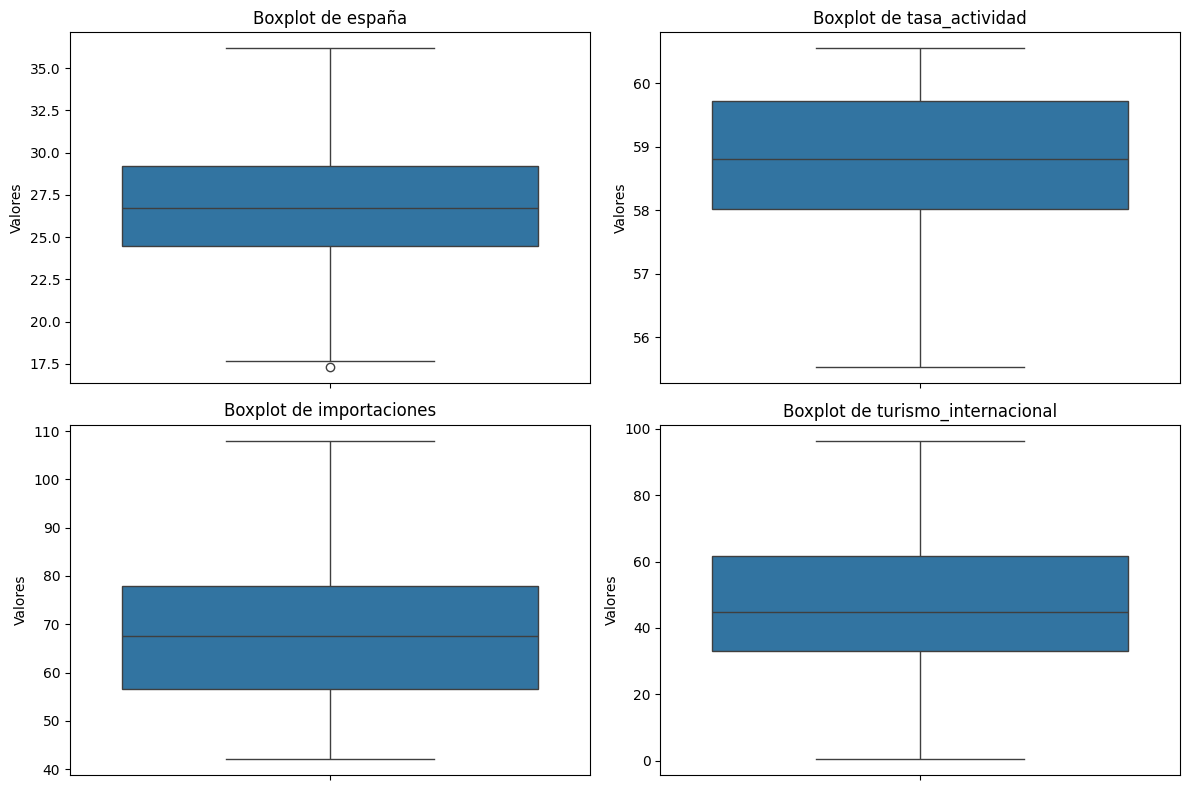

In [712]:
#visualizamos una vez transformado
# Columnas seleccionadas
columnas_outliers = ['españa', 'tasa_actividad', 'importaciones', 'turismo_internacional']

# Crear boxplots individuales
plt.figure(figsize=(12, 8))

for i, col in enumerate(columnas_outliers, 1):
    plt.subplot(2, 2, i)  # Crear una cuadrícula 2x2
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
    plt.ylabel("Valores")

plt.tight_layout()
plt.show()



In [713]:
#Se observa que hay un valor extremo en el PIB español, que no cubre el rango intercuartílico. Vamos a intentar identificarlo y transofrmarlo
# Calcular los cuartiles y el IQR
Q1 = df['españa'].quantile(0.25)
Q3 = df['españa'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un valor como outlier
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el outlier
outlier = df[(df['españa'] < limite_inferior) | (df['españa'] > limite_superior)]

# Mostrar el valor y su índice
print(outlier[['españa']])


   españa
5   17.33


In [714]:
# Calcular el límite inferior
limite_inferior = Q1 - 1.5 * IQR

# Reemplazar los valores menores al límite inferior con el propio límite inferior
df.loc[df['españa'] < limite_inferior, 'españa'] = limite_inferior

# Verificar si quedan outliers
print(df[['españa']].describe())

          españa
count  99.000000
mean   26.443359
std     4.047689
min    17.407500
25%    24.472500
50%    26.740000
75%    29.182500
max    36.170000


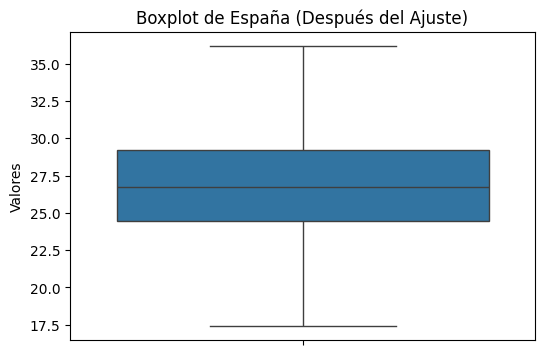

In [715]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['españa'])
plt.title("Boxplot de España (Después del Ajuste)")
plt.ylabel("Valores")
plt.show()


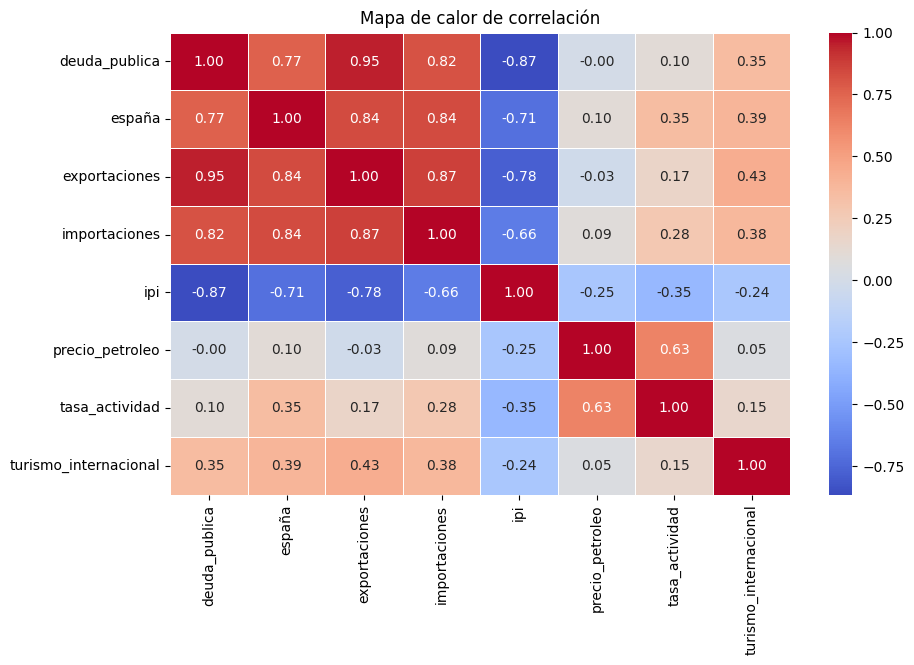

In [716]:
# Mapa de calor de correlación sin la columna 'trimestres'
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()

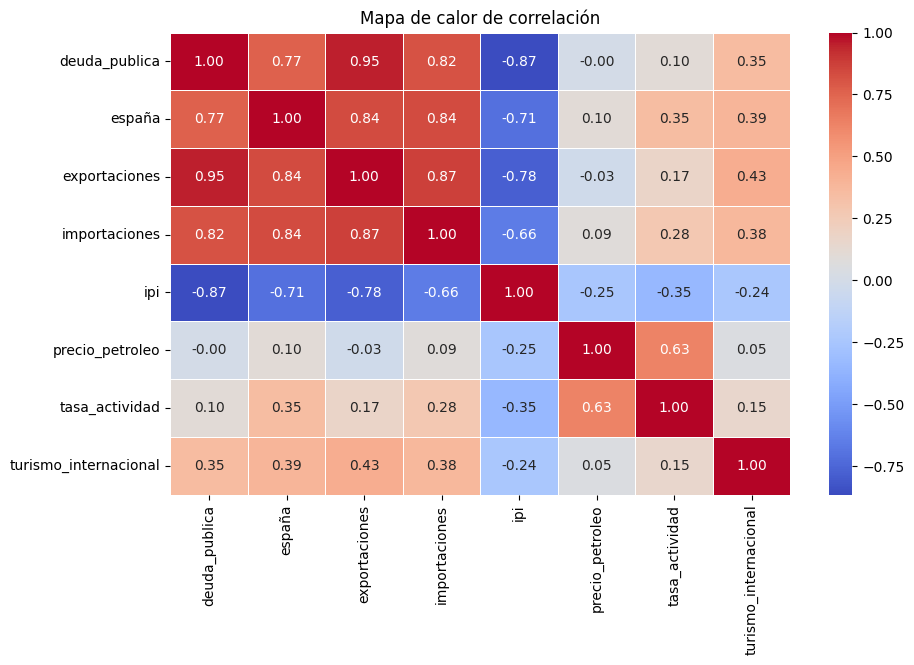

In [717]:
# Mapa de calor de correlación sin la columna 'trimestres'
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()

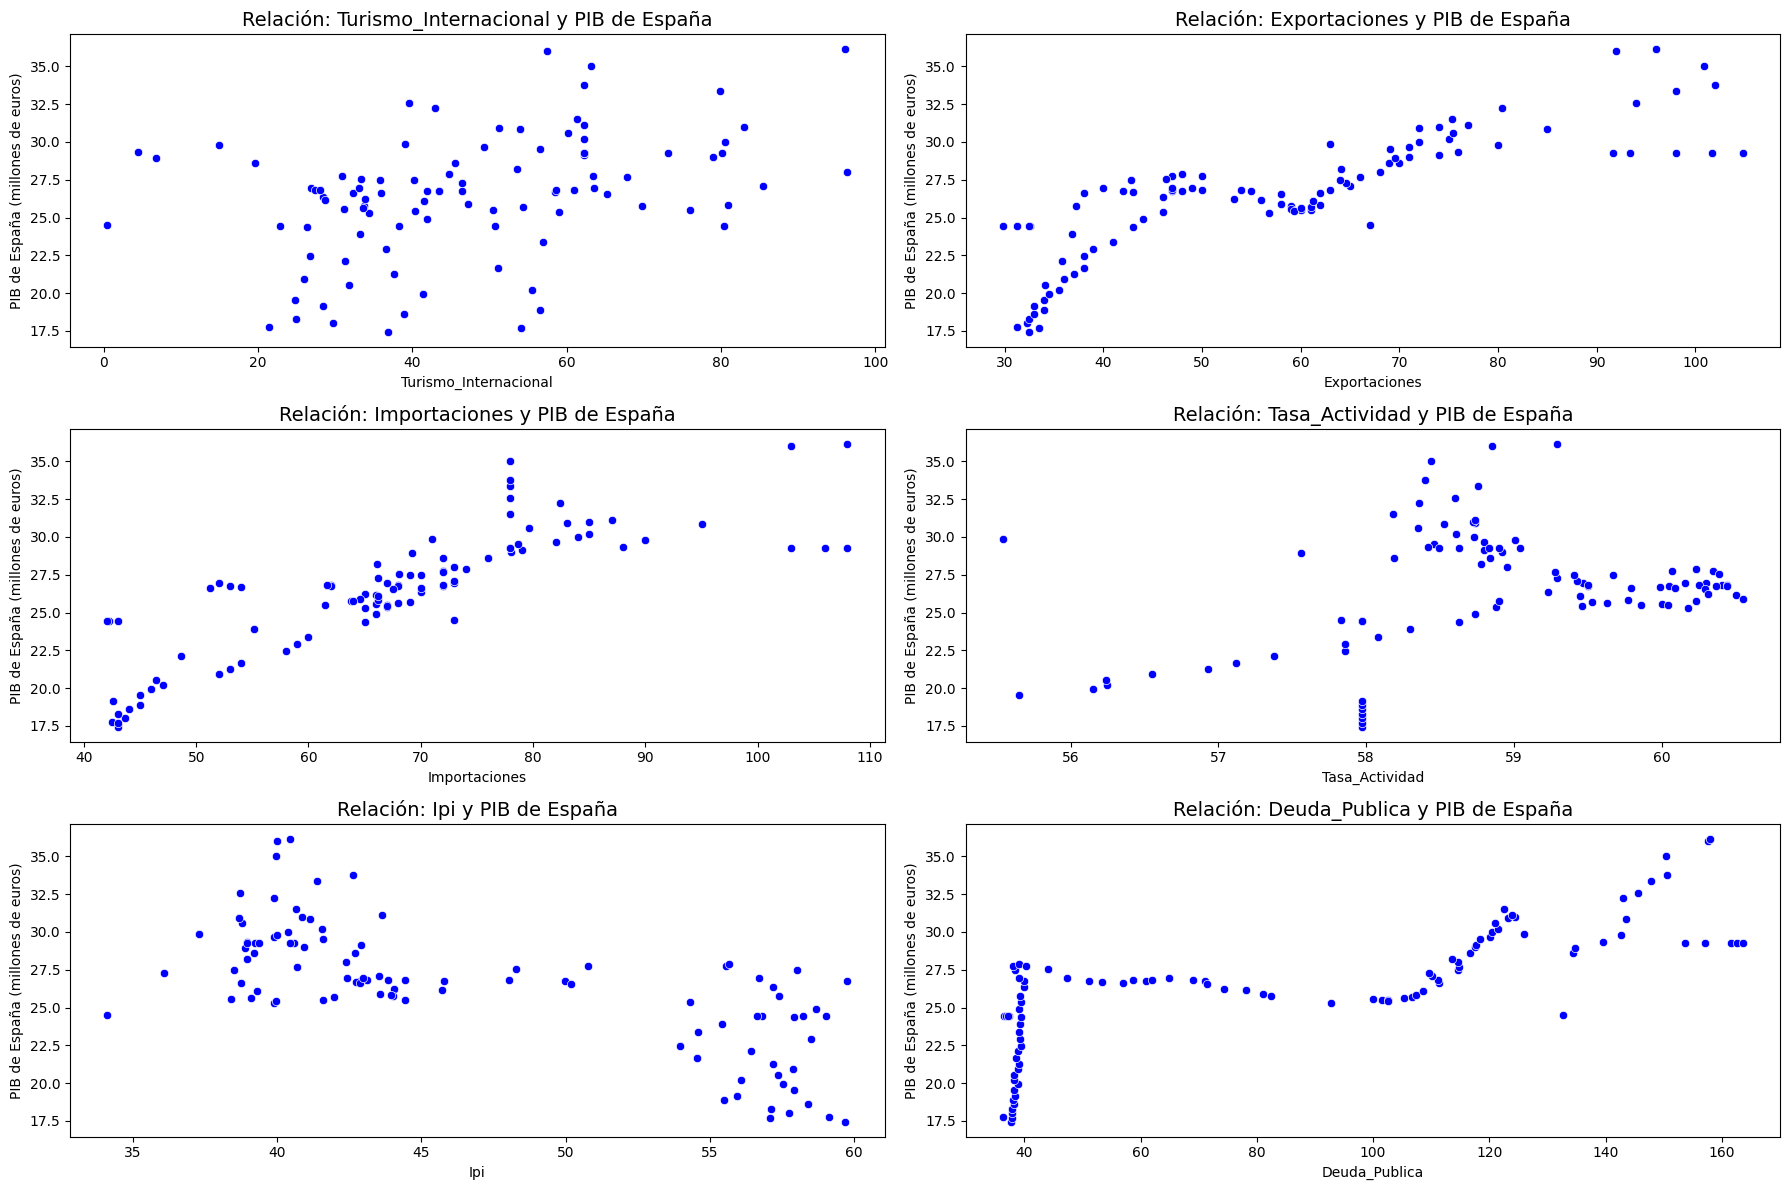

In [718]:
# Definir variables
variables_independientes = [ "turismo_internacional",
                            "exportaciones", "importaciones", "tasa_actividad", "ipi", "deuda_publica"]
variable_objetivo = "españa"

# Asegurar que no haya valores nulos en las variables seleccionadas
df = df.dropna(subset=[variable_objetivo] + variables_independientes)

### 1. Diagramas de dispersión ###
num_vars = len(variables_independientes)
num_cols = 2  # Número de columnas en los subplots
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)  # Ajuste para casos impares

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axes = axes.flatten()  # Para acceder a los subgráficos fácilmente

for i, var in enumerate(variables_independientes):
    sns.scatterplot(x=df[var], y=df[variable_objetivo], ax=axes[i], color="blue")
    axes[i].set_title(f"Relación: {var.title()} y PIB de España", fontsize=14)
    axes[i].set_xlabel(var.title())
    axes[i].set_ylabel("PIB de España (millones de euros)")


plt.tight_layout()
plt.show()

<ipython-input-719-1cee744ab71d>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = modelo.pvalues[1] if len(modelo.pvalues) > 1 else None
<ipython-input-719-1cee744ab71d>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = modelo.pvalues[1] if len(modelo.pvalues) > 1 else None
<ipython-input-719-1cee744ab71d>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = modelo.pvalues[1] if len(modelo.pvalues) > 1 el

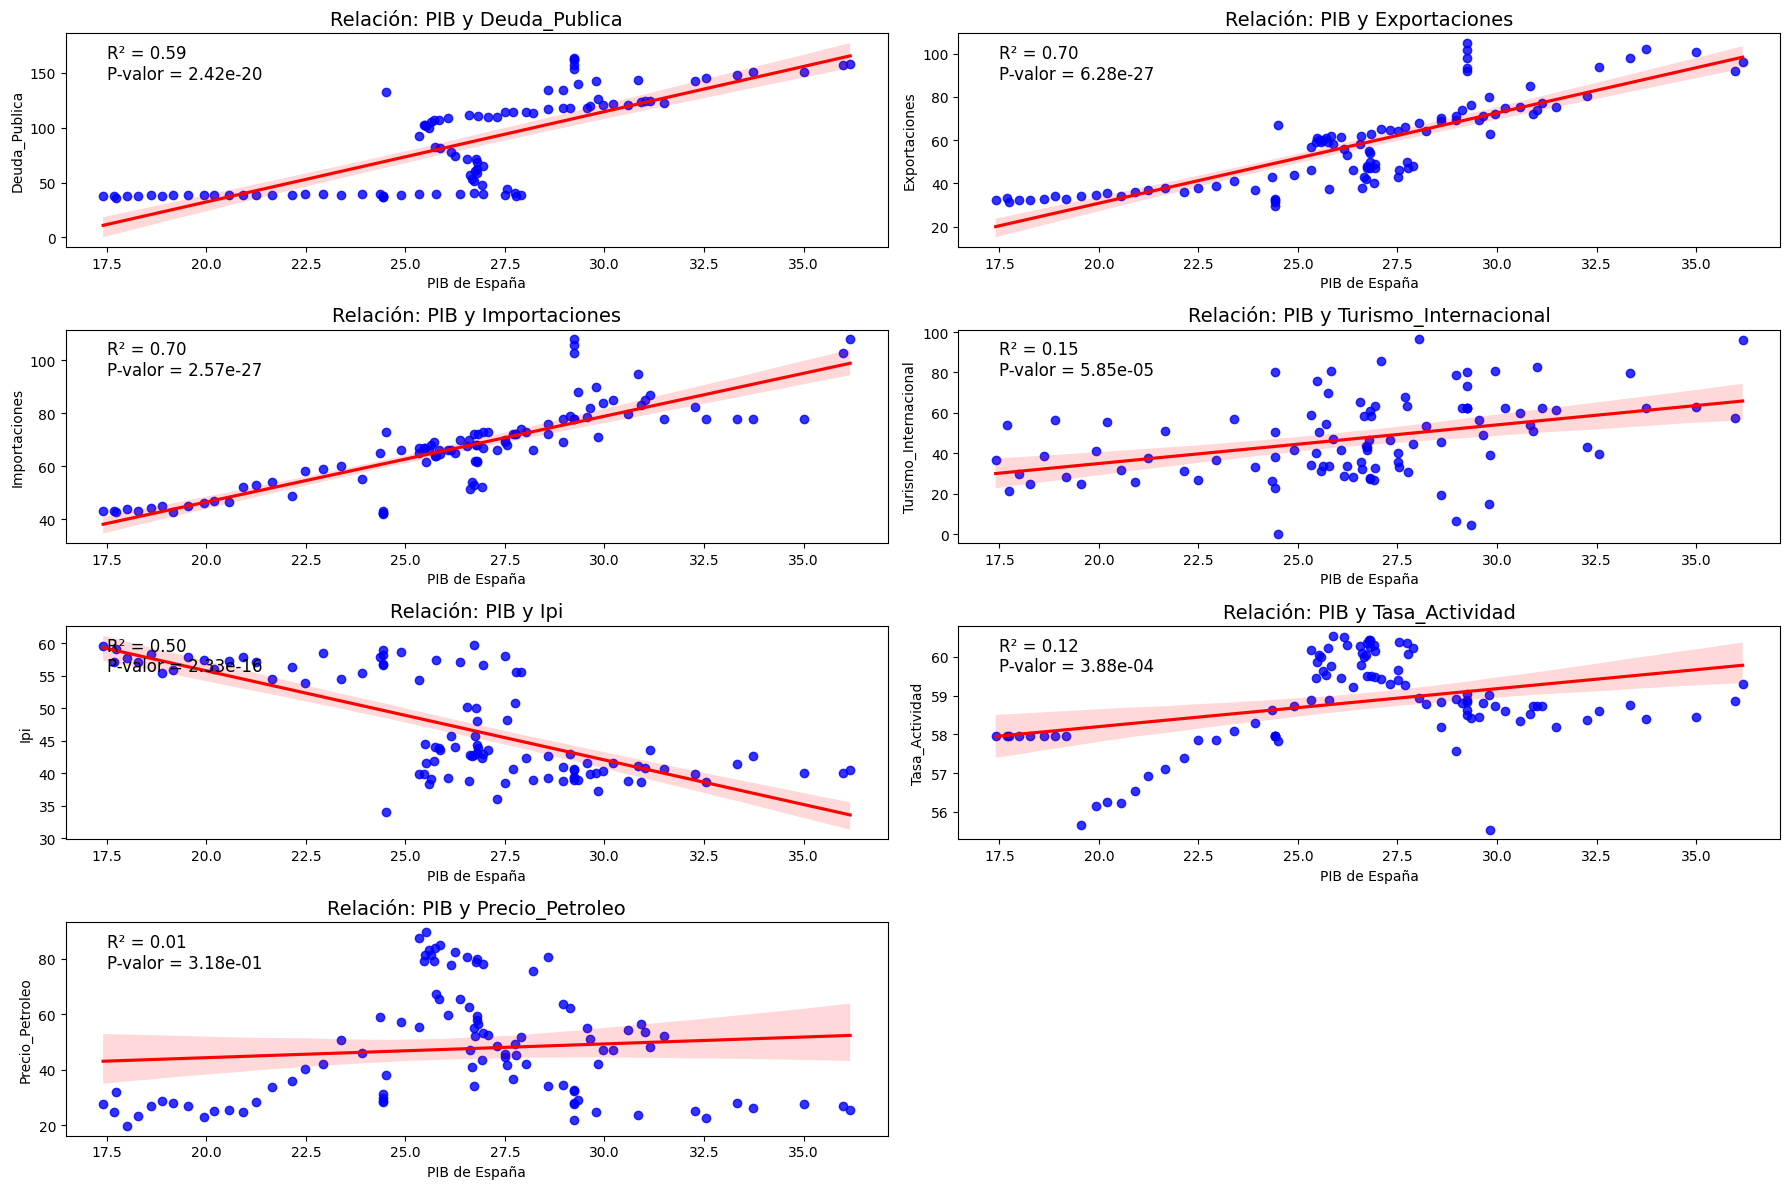

In [719]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Definir variables
variables_dependientes = ['deuda_publica', 'exportaciones', 'importaciones', 'turismo_internacional', 'ipi', 'tasa_actividad', 'precio_petroleo']
españa = 'españa'

# Determinar el número de filas y columnas necesarias para los subplots
num_vars = len(variables_dependientes)
filas = (num_vars // 2) + (num_vars % 2)  # 2 columnas, ajustando las filas
columnas = 2

# Crear subplots
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables_dependientes, 1):
    X = df[españa]  # PIB como variable independiente
    y = df[var]     # Cada variable dependiente

    # Manejar valores nulos si existen
    X = X.dropna()
    y = y.dropna()

    # Asegurar que X e Y tengan la misma cantidad de datos tras eliminar nulos
    df_temp = pd.concat([X, y], axis=1).dropna()
    X_clean = df_temp[españa]
    y_clean = df_temp[var]

    # Añadir constante para la regresión
    X_const = sm.add_constant(X_clean)
    modelo = sm.OLS(y_clean, X_const).fit()

    # Extraer métricas
    p_valor = modelo.pvalues[1] if len(modelo.pvalues) > 1 else None
    r2 = modelo.rsquared

    # Graficar
    plt.subplot(filas, columnas, i)
    sns.regplot(x=X_clean, y=y_clean, color="blue", line_kws={'color': 'red'})
    plt.title(f"Relación: PIB y {var.title()}", fontsize=14)
    plt.xlabel("PIB de España")
    plt.ylabel(var.title())

    # Anotar R² y p-valor en el gráfico
    plt.text(
        0.05, 0.95, f"R² = {r2:.2f}\nP-valor = {p_valor:.2e}" if p_valor is not None else "Insuficientes datos",
        fontsize=12, color="black",
        ha="left", va="top", transform=plt.gca().transAxes
    )

plt.tight_layout()
plt.show()

In [720]:
#R² muy bajo (0.01) → Indica que el precio del petróleo solo explica el 1% de la variabilidad del PIB. Es una relación prácticamente nula.
#P-valor alto (0.319) → No es estadísticamente significativo (comúnmente se usa un umbral de 0.05). Esto significa que la relación observada podría deberse al azar.

# Eliminar la columna 'precio_petroleo' del dataframe
df = df.drop(columns=['precio_petroleo'])

# Verificar que la columna haya sido eliminada
print(df.columns)

Index(['trimestres', 'españa', 'turismo_internacional', 'exportaciones',
       'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica'],
      dtype='object')


<ipython-input-721-4b949254e8c0>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trimestres'] = pd.to_datetime(df['trimestres'], errors='coerce')


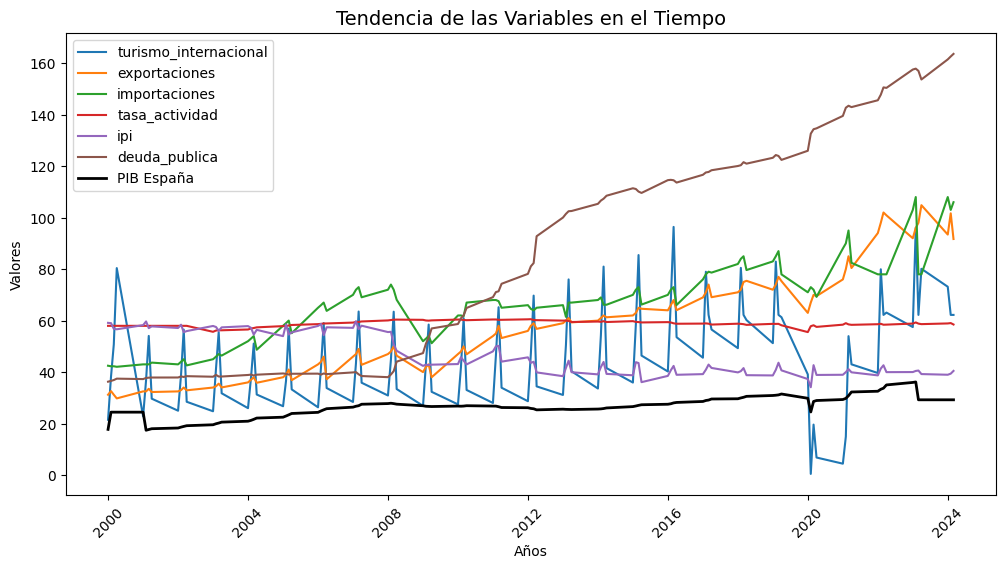

In [721]:
### 4. Gráficos de tendencias ###
# Asegurar que 'trimestres' es de tipo fecha y ordenar
if 'trimestres' in df.columns:
    df['trimestres'] = pd.to_datetime(df['trimestres'], errors='coerce')
    df = df.sort_values('trimestres')

    fig, ax = plt.subplots(figsize=(12, 6))

    # Graficar cada variable independiente
    for var in variables_independientes:
        sns.lineplot(x=df['trimestres'], y=df[var], label=var, ax=ax)

    # Graficar la variable objetivo PIB de España en un color destacado
    sns.lineplot(x=df['trimestres'], y=df['españa'], label="PIB España", ax=ax, color="black", linewidth=2)

    # Configuración del gráfico
    ax.set_title("Tendencia de las Variables en el Tiempo", fontsize=14)
    ax.set_xlabel("Años")
    ax.set_ylabel("Valores")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


En este gráfico se ha dibujado el PIB en negro para distinguirlo mejor, y podemos observar a priori que no presenta una tendencia definida de crecimiento o decrecimiento lo que implica que no será necesario tomar medidas para eliminar la tendencia y convertirla en estacionaria.
Aún así a continuación llevaremos a cabo pruebas específicas para comprobar la estacionariedad de la serie temporal del PIB de España en base a los trimestres con ánimo de aplicar en un futuro un modelo ARIMA. Los pasos a seguir son:
- un gráfico de la serie temporal, ya realizado, en el que comprobanmos visualmente si parece o no estacionaria. (Concluimos ya, que no hay una tendencia marcada).
- Prueba de Dickey-Fuller aumentada (prueba estadística para comprobar la estacionariedad).
-Gráficos de autocorrelación parcial y autocorrelación.


In [722]:
# Realizar la prueba de Dickey-Fuller Aumentada
adf_test = adfuller(df['españa'])

# Mostrar los resultados de la prueba ADF
print("Estadístico ADF:", adf_test[0])
print("P-valor:", adf_test[1])

Estadístico ADF: -2.405862109168615
P-valor: 0.14008870300495196


Esta prueba indica que si este resultado es mayor que 0.05, la serie probablemente no es estacionaria. El resultado del p-valor, es 0.14.

In [723]:
print(df.columns.tolist())

['trimestres', 'españa', 'turismo_internacional', 'exportaciones', 'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica']


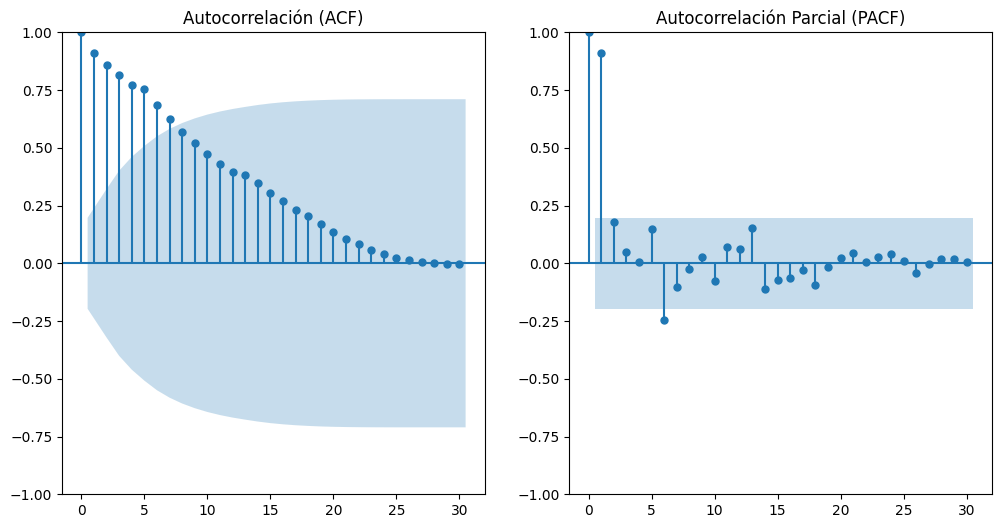

In [724]:
# Graficar la autocorrelación (ACF) y la autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['españa'], lags=30, ax=plt.gca())
plt.title('Autocorrelación (ACF)')

plt.subplot(122)
plot_pacf(df['españa'], lags=30, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF)')

plt.show()


El ACF muestra la correlación entre una observación y las anteriores (con retardo). Que la primera barra llegue a 1, demuestra que las observaciones están muy correlacionadas con su primer retardo, lo que demuestra o tendencia a largo plazo o una componente autorregresiva de primer orden. Y la disminución gradual sugiere que la serie pierde fuerza en sus autocorrelaciones con retardos más largos. Concluimos con que es necesaria la aplicación de, por lo menos, una diferenciación.

El PACF muestra la autocorrelación entre una observación y su retardo depués de eliminar el efecto de las observaciones intermedias. La primera barra está en 1, y la segunda en 0,9 aproximadamente,lo que es interesante ya que demuestra que hay correlación hasta el segundo retardo.
Que la segunda barra esté en 0,9, sugiere que hay un efecto autorregresivo, muy fuerte a primer y segundo orden. Esto es típico de una componente autorregresiva. La caída a valores bajos (alrededor de 0.25 y negativos) en los retardos más largos indica que los efectos autorregresivos disminuyen con el tiempo. La autocorrelación parcial sugiere que el modelo AR podría no necesitar más de dos términos.




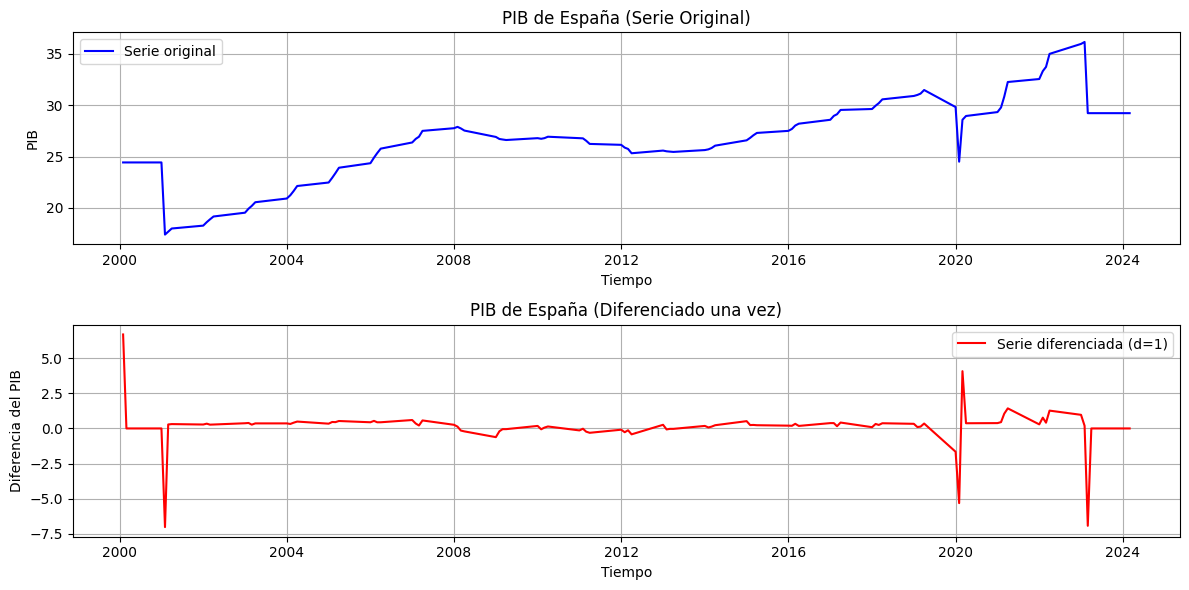

In [725]:
# Aplicar diferenciación
df['españa_diff'] = df['españa'].diff()

# Eliminar la primera fila con NaN
df = df.dropna()

# Graficar
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['trimestres'], df['españa'], label="Serie original", color='b')
plt.title("PIB de España (Serie Original)")
plt.xlabel("Tiempo")
plt.ylabel("PIB")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df['trimestres'], df['españa_diff'], label="Serie diferenciada (d=1)", color='r')
plt.title("PIB de España (Diferenciado una vez)")
plt.xlabel("Tiempo")
plt.ylabel("Diferencia del PIB")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Comprobemos si se ha vuelto estacionaria con otra prueba adf.

Esta serie devuelve un p-valor extremadamente bajo, muy cercano a 0, por lo que indica que la serie es estacionaria. (Además gracias al gráfico entendemos que así es). Con esto, la serie diferenciada una sola vez ya es estacionaria. No es necesario aplicar más diferenciaciones, porque la hipótesis nula de no estacionariedad se rechaza.
Más adelante continuaríamos identificando los parámetros AR y MA para el modelo ARIMA.

Aún no tenemos claro qué modelo aplicaremos. Vamos a llevar a cabo una modelización clásica de las variables, para poder trabajar una vez llevado a cabo, con el que más nos convenga, regresión lineal, ARIMA...
Vamos a estudiar la estacionariedad y aplicaremos diferencias a las que no lo sean. Tendremos en cuenta, que  podemos aplicar regresión lineal con series diferenciadas, pero el modelo explicará cambios en la variable dependiente, en función de cambios en las independientes. La regresión lineal clásica, asume que los errores no están correlacionados en el tiempo, si lo estuvieran, deberíamos aplicar VAR o SARIMAX.

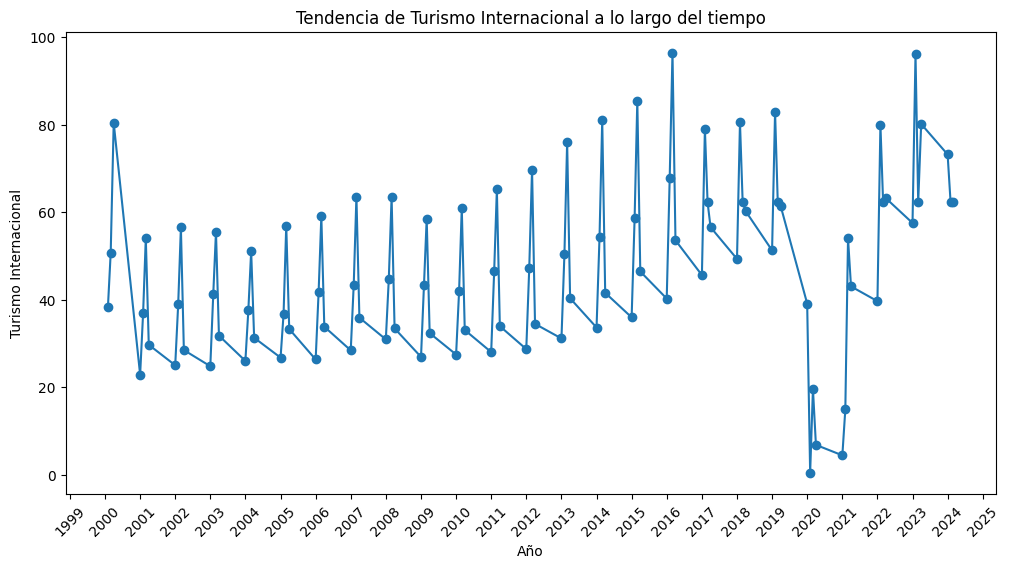

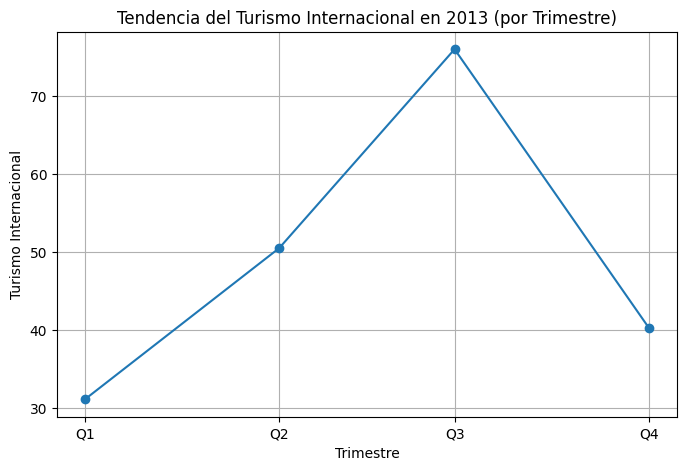

In [726]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

if 'trimestres' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['trimestres'], df['turismo_internacional'], marker='o')
    plt.title("Tendencia de Turismo Internacional a lo largo del tiempo")
    plt.xlabel("Año")
    plt.ylabel("Turismo Internacional")
    plt.xticks(rotation=45)

    ax = plt.gca()
    # Establecer el localizador para que muestre una etiqueta por año
    ax.xaxis.set_major_locator(mdates.YearLocator())
    # Formatear la etiqueta para que solo muestre el año
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.show()
    # Asegurar que 'trimestres' sea tipo datetime
df['trimestres'] = pd.to_datetime(df['trimestres'])

# Filtrar solo el año 2013
df_2013 = df[df['trimestres'].dt.year == 2013]

# Crear etiquetas de trimestres de forma manual
trimestre_labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.plot(df_2013['trimestres'], df_2013['turismo_internacional'], marker='o', linestyle='-')

# Configurar títulos y ejes
plt.title("Tendencia del Turismo Internacional en 2013 (por Trimestre)")
plt.xlabel("Trimestre")
plt.ylabel("Turismo Internacional")

# Modificar el eje X para que solo muestre Q1, Q2, Q3 y Q4
plt.xticks(df_2013['trimestres'], labels=trimestre_labels)

plt.grid()
plt.show()



Cuando hemos hecho el gráfico de tendencia hemos visto que evidentemente el turismo presenta una estacionalidad marcada en verano por el clima español y sus destinos de playa. Así que gracias a este gráfico a lo largo del tiempo vemos que efectivamente sería bueno aplicar varibales dummy para capturar el efecto estacional de forma separada. No obstante y tras una exhaustiva búsqueda de información sobre qué decisión era más correcta tomar, si aislar o no el componente estacional, encontré información en un artículo del INE "La estacionalidad y el análisis econométrico: un planteamiento alternativo", el cual me aportó la información necesaria para tomar la decisión de no aplicar "variables fictias". Concluía que "el tratamiento más correcto de la estacionalidad de modelización econométrica es el que se obtiene mediante la utilización de los modelos con parámetros cambiantes en cualquiera de las versiones apuntadas" También, se expresa que "en casos especiales en que se dan características como estacionalidad estable o separable, sí sería adecuada la utilización de varibales ficticias".
Con esto entendemos que a las exportaciones e importaciones que presentan una estacionalidad marcada pero ligeramente variante, no deberíamos aplicarles variables dummy. Por otro lado, pensé que el turismo sí presentaba una estacionalidad estable y separable, no obstante desde 2020 la tendencia no ha vuelto a seguir el esquema histórico, por lo que se concluye en no aplicarlas a esta variable tampoco y trabajar siempre teniendo en cuenta y recordando que hay variables que presentan estacionalidad. Así capturaremos la variablidad "natural" y la influencia directa de los "picos" en el PIB de nuestras tres variables independientes con estacionalidad (turismo_internacional, exportaciones, importaciones). El futuro modelo capturará la tendencia subyacente y la estacionalidad, y al ser una parte relevante y esperada del comportamiento económico de mis tres variables, mantenerlas permiten reflejar el impacto real en la predicción.
==> puede ser útil aplicar SARIMAX (incorpora estacionalidad + variables indpendientes, es decir externas, al modelo)
==> además, un arima simple para la predicción del pib en base al tiempo
1. para el arima:
para que el modelo AR funcione bien, no debería presentar la serie temmporal una tendencia definida de crecimiento o decrecimiento. (estacionalidad)
a continuación se añadirá a la predicción una combinación linela de los errores pasados. usar model en rstudi, buscar alternativa en python, para calcular el modelo ARIMA optimo para una serie temporal.

Vamos a tratar esta variable de forma que, evitando usar variables dummy para capturar estacionalidad por la razón comentada arriba, sí se utilicen para tener en cuenta el antes y después de la pandemia, ya que puede observarse claramente como la serie cambia desde entonces. Además, utilizaremos una diferenciación estacional d=1, para suavizar los picos en el segundo, y sobre todo en el tercer trimestre,

In [727]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df['turismo_internacional'])
print(f"P-valor (Serie Original): {resultado[1]}")


P-valor (Serie Original): 0.1945360667668828


In [728]:
df['turismo_seasonal_diff'] = df['turismo_internacional'].diff(4)  # Diferencia trimestral si hay estacionalidad
resultado_seasonal_diff = adfuller(df['turismo_seasonal_diff'].dropna())
print(f"P-valor (Diferencia Estacional): {resultado_seasonal_diff[1]}")

P-valor (Diferencia Estacional): 0.0009629503156333745


La serie ya es estacionaria

turismo_dummy
0    81
1    17
Name: count, dtype: int64


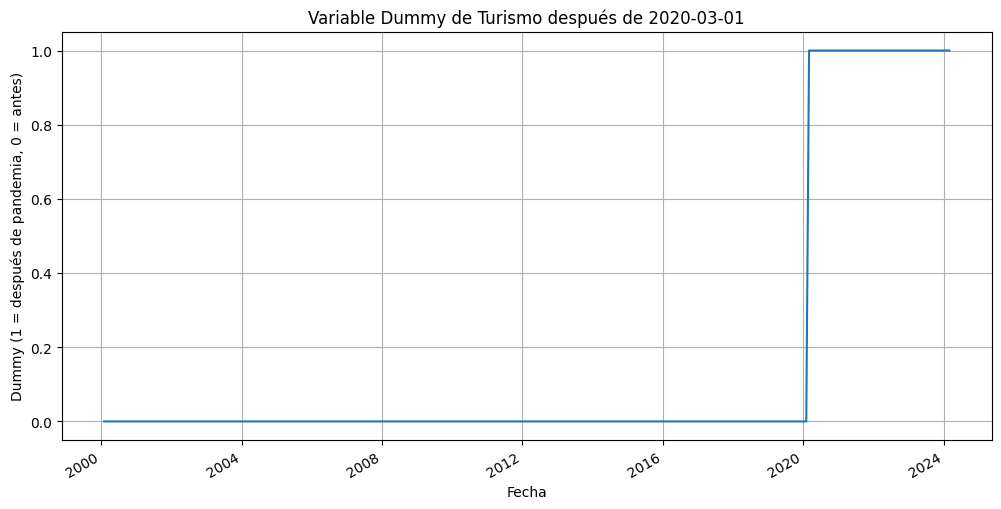

In [729]:
df['fecha'] = pd.to_datetime(df['trimestres'], format='%Y-%m-%d')  # Ajusta el formato según tu columna
df.set_index('fecha', inplace=True)
# Asegúrate de que la columna 'fecha' sea tipo datetime
df['turismo_dummy'] = (df.index >= '2020-03-01').astype(int)

# Verificar la distribución de la variable dummy
print(df['turismo_dummy'].value_counts())  # Ver cuántos 1 y 0 hay

# Graficar la serie dummy
df['turismo_dummy'].plot(figsize=(12, 6), title="Variable Dummy de Turismo después de 2020-03-01")
plt.xlabel('Fecha')
plt.ylabel('Dummy (1 = después de pandemia, 0 = antes)')
plt.grid(True)
plt.show()


Gracias a la diferenciación estacional, conseguimos eliminar la estacionalidad de la serie temporal, con fluctuaciones que ocurren a intervalos regulares, como los picos cada tercer trimestre. Y gracias a la variable fummy, se eliminan eventos discontínuos como sería la pandemia, sin periocidad regular.

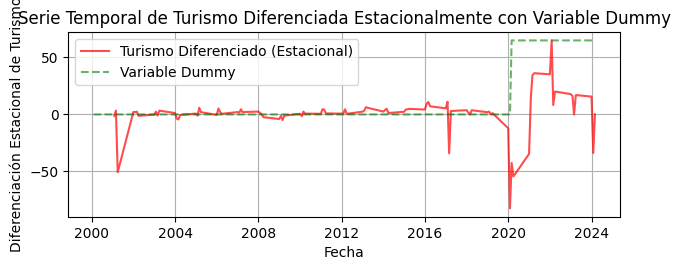

In [730]:
# Subgráfico 2: Serie de turismo diferenciada con la diferencia estacional, incluyendo la dummy
plt.subplot(2, 1, 2)
plt.plot(df['turismo_seasonal_diff'], label='Turismo Diferenciado (Estacional)', color='r', alpha=0.7)
plt.plot(df.index, df['turismo_dummy'] * df['turismo_seasonal_diff'].max(), label='Variable Dummy', color='g', linestyle='--', alpha=0.6)
plt.title('Serie Temporal de Turismo Diferenciada Estacionalmente con Variable Dummy')
plt.xlabel('Fecha')
plt.ylabel('Diferenciación Estacional de Turismo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Procedemos a modelizar el resto de nuestras variables estudiando su estacionariedad. La tendencia creciente de la dueda pública, exportaciones e importaciones, o la decreciente del índice IPI, y la probable estacionariedad de la tasa de actividad.


Comprobando estacionariedad para la variable: exportaciones


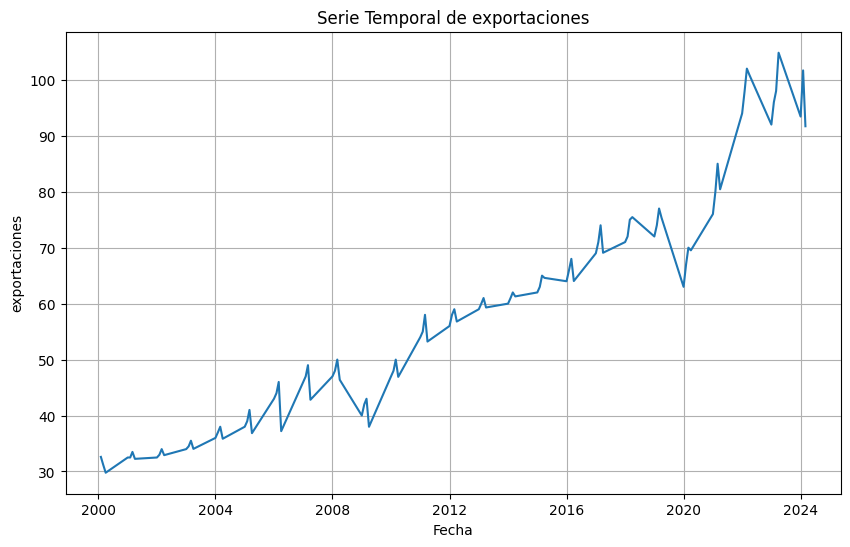

Estadístico ADF para exportaciones: 1.1145971766596914
P-valor para exportaciones: 0.9953392981413278
Valor crítico ADF para exportaciones: {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}
La serie temporal de exportaciones NO es estacionaria. Se requiere diferenciación.


Comprobando estacionariedad para la variable: importaciones


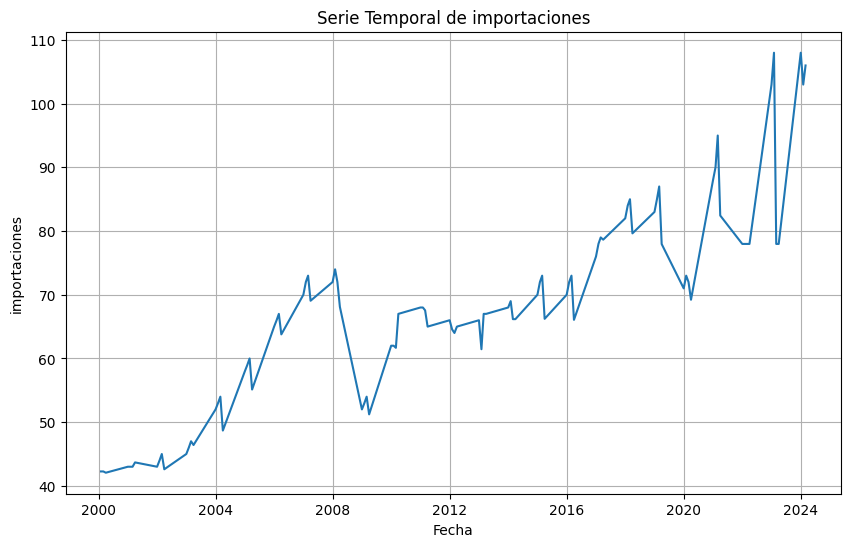

Estadístico ADF para importaciones: -0.30305846904316147
P-valor para importaciones: 0.9250700430991927
Valor crítico ADF para importaciones: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}
La serie temporal de importaciones NO es estacionaria. Se requiere diferenciación.


Comprobando estacionariedad para la variable: tasa_actividad


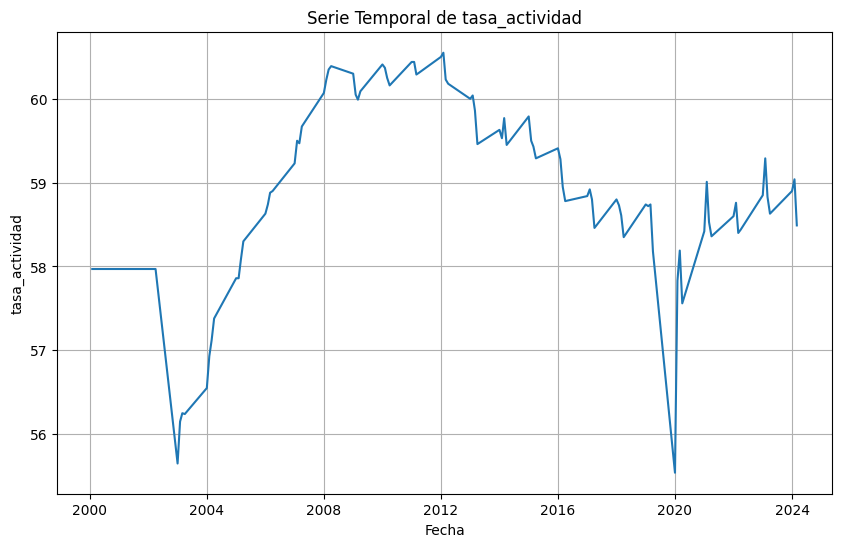

Estadístico ADF para tasa_actividad: -1.500374279379174
P-valor para tasa_actividad: 0.5333261801335735
Valor crítico ADF para tasa_actividad: {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
La serie temporal de tasa_actividad NO es estacionaria. Se requiere diferenciación.


Comprobando estacionariedad para la variable: ipi


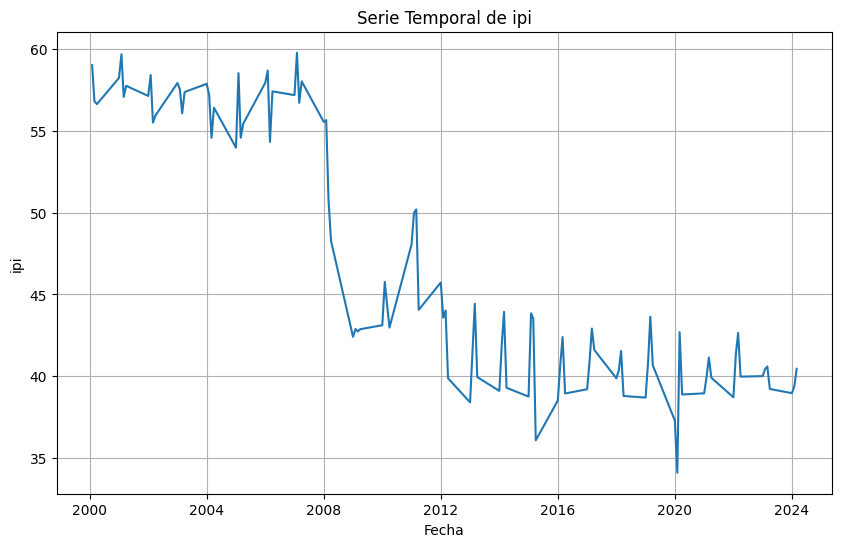

Estadístico ADF para ipi: -1.5727385462541839
P-valor para ipi: 0.49727173035795136
Valor crítico ADF para ipi: {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
La serie temporal de ipi NO es estacionaria. Se requiere diferenciación.


Comprobando estacionariedad para la variable: deuda_publica


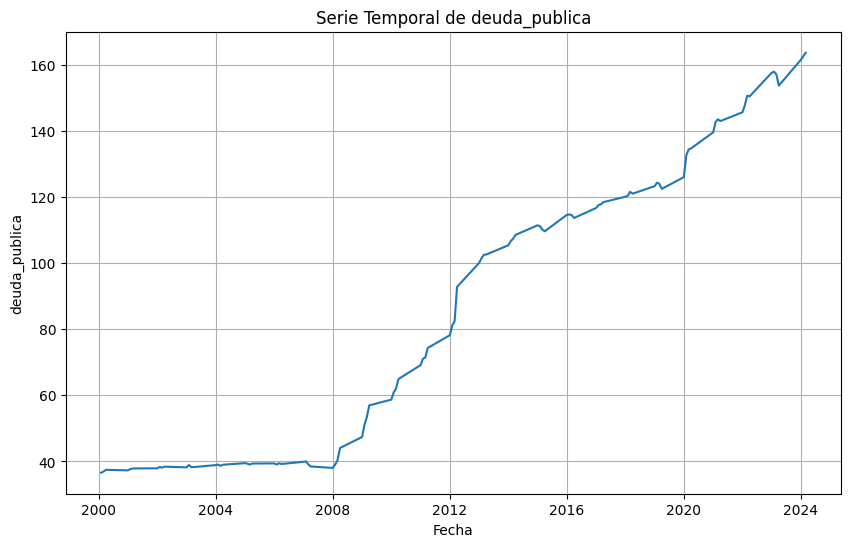

Estadístico ADF para deuda_publica: 0.5512679554030497
P-valor para deuda_publica: 0.9863508012888633
Valor crítico ADF para deuda_publica: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
La serie temporal de deuda_publica NO es estacionaria. Se requiere diferenciación.



In [731]:
# Lista de variables a comprobar
variables = ['exportaciones', 'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica']

# Función para realizar prueba ADF y graficar la serie temporal
def check_stationarity(df, variables):
    for var in variables:
        print(f"\nComprobando estacionariedad para la variable: {var}")

        # 1. Visualización de la serie temporal
        plt.figure(figsize=(10, 6))
        plt.plot(df[var])
        plt.title(f'Serie Temporal de {var}')
        plt.xlabel('Fecha')
        plt.ylabel(var)
        plt.grid(True)
        plt.show()

        # 2. Realizar la prueba ADF
        result = adfuller(df[var].dropna())  # Eliminamos valores nulos si existen
        print(f"Estadístico ADF para {var}: {result[0]}")
        print(f"P-valor para {var}: {result[1]}")
        print(f"Valor crítico ADF para {var}: {result[4]}")

        # Comprobamos si es estacionaria
        if result[1] < 0.05:
            print(f"La serie temporal de {var} es estacionaria.\n")
        else:
            print(f"La serie temporal de {var} NO es estacionaria. Se requiere diferenciación.\n")


# Llamar a la función para verificar todas las variables
check_stationarity(df, variables)


Tratando con la variable: exportaciones


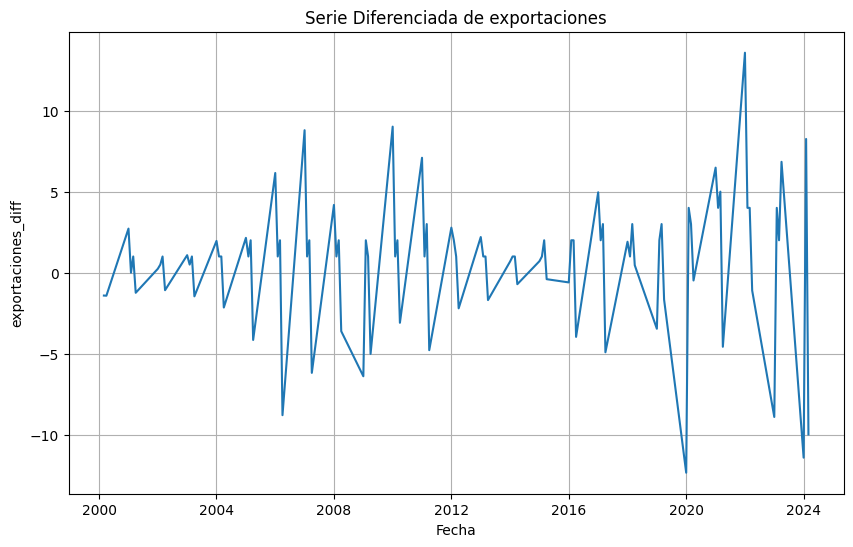

Estadístico ADF para exportaciones_diff: -3.051759023024216
P-valor para exportaciones_diff: 0.03033540007445134
Valor crítico ADF para exportaciones_diff: {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}
La serie diferenciada de exportaciones es estacionaria.


Tratando con la variable: importaciones


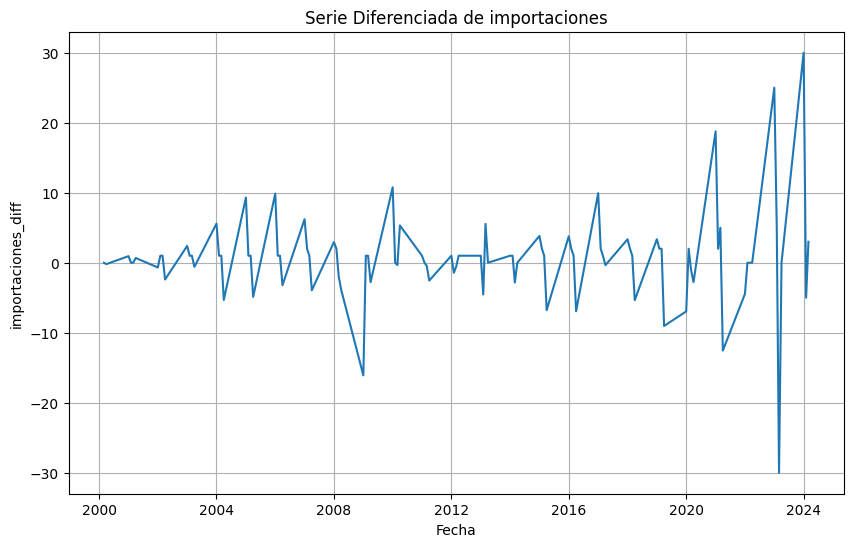

Estadístico ADF para importaciones_diff: -3.5813325703969436
P-valor para importaciones_diff: 0.006128102736039402
Valor crítico ADF para importaciones_diff: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}
La serie diferenciada de importaciones es estacionaria.


Tratando con la variable: tasa_actividad


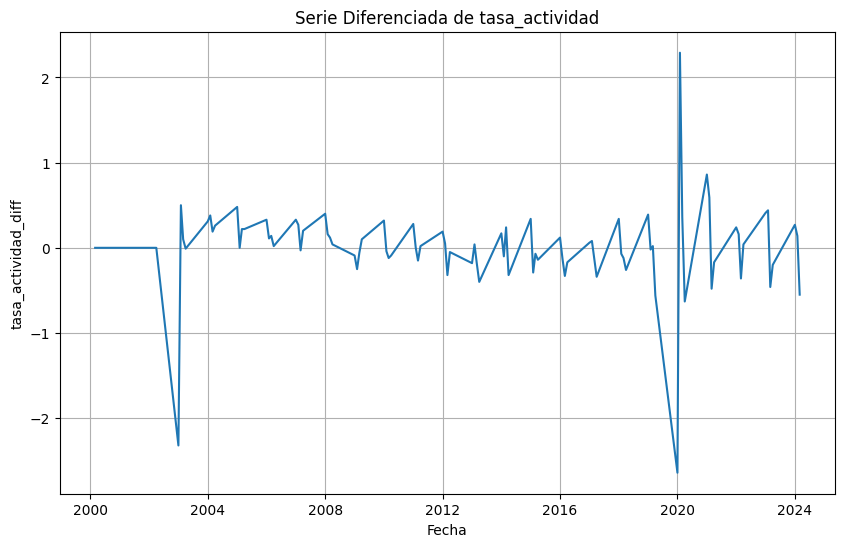

Estadístico ADF para tasa_actividad_diff: -9.625277200246563
P-valor para tasa_actividad_diff: 1.6670814746320488e-16
Valor crítico ADF para tasa_actividad_diff: {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
La serie diferenciada de tasa_actividad es estacionaria.


Tratando con la variable: ipi


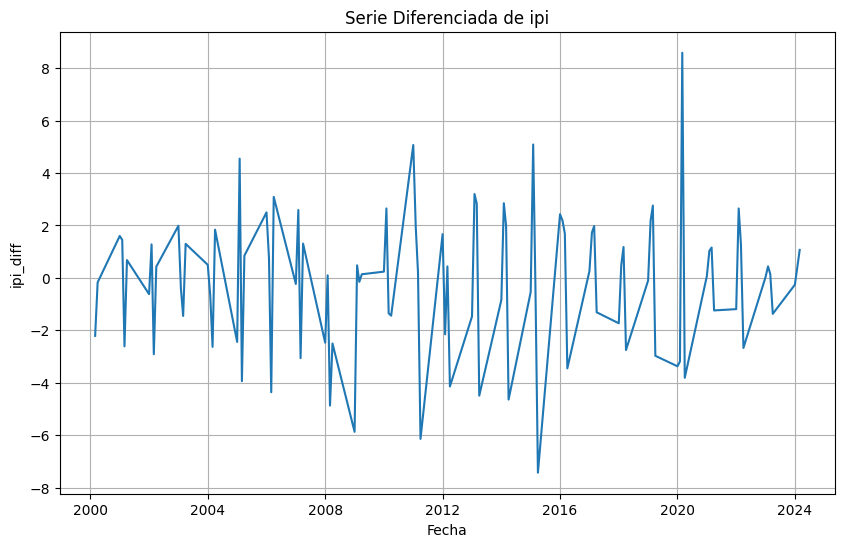

Estadístico ADF para ipi_diff: -4.7137760822797965
P-valor para ipi_diff: 7.927873623182686e-05
Valor crítico ADF para ipi_diff: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
La serie diferenciada de ipi es estacionaria.


Tratando con la variable: deuda_publica


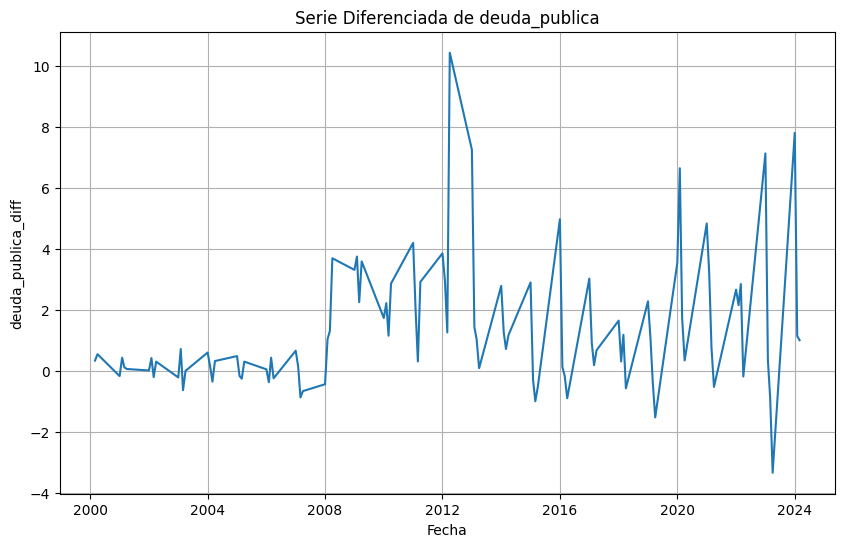

Estadístico ADF para deuda_publica_diff: -3.0378977015509205
P-valor para deuda_publica_diff: 0.03150362279368557
Valor crítico ADF para deuda_publica_diff: {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
La serie diferenciada de deuda_publica es estacionaria.



In [732]:
#Todas requieren diferenciacion
# Aplicar diferenciación de primer orden y verificar estacionariedad nuevamente

# Aplicar diferenciación de primer orden y verificar estacionariedad nuevamente
def apply_differences(df, variables):
    for var in variables:
        print(f"\nTratando con la variable: {var}")

        # 1. Aplicar diferencia de primer orden
        df[f'{var}_diff'] = df[var].diff()

        # 2. Visualizar la serie diferenciada
        plt.figure(figsize=(10, 6))
        plt.plot(df[f'{var}_diff'])
        plt.title(f'Serie Diferenciada de {var}')
        plt.xlabel('Fecha')
        plt.ylabel(f'{var}_diff')
        plt.grid(True)
        plt.show()

        # 3. Realizar la prueba ADF para la serie diferenciada
        result = adfuller(df[f'{var}_diff'].dropna())
        print(f"Estadístico ADF para {var}_diff: {result[0]}")
        print(f"P-valor para {var}_diff: {result[1]}")
        print(f"Valor crítico ADF para {var}_diff: {result[4]}")

        # Comprobamos si es estacionaria
        if result[1] < 0.05:
            print(f"La serie diferenciada de {var} es estacionaria.\n")
        else:
            print(f"La serie diferenciada de {var} NO es estacionaria. Puede que se necesite diferenciación estacional.\n")

# Llamar a la función para aplicar diferencias y verificar estacionariedad
variables = ['exportaciones', 'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica']
apply_differences(df, variables)


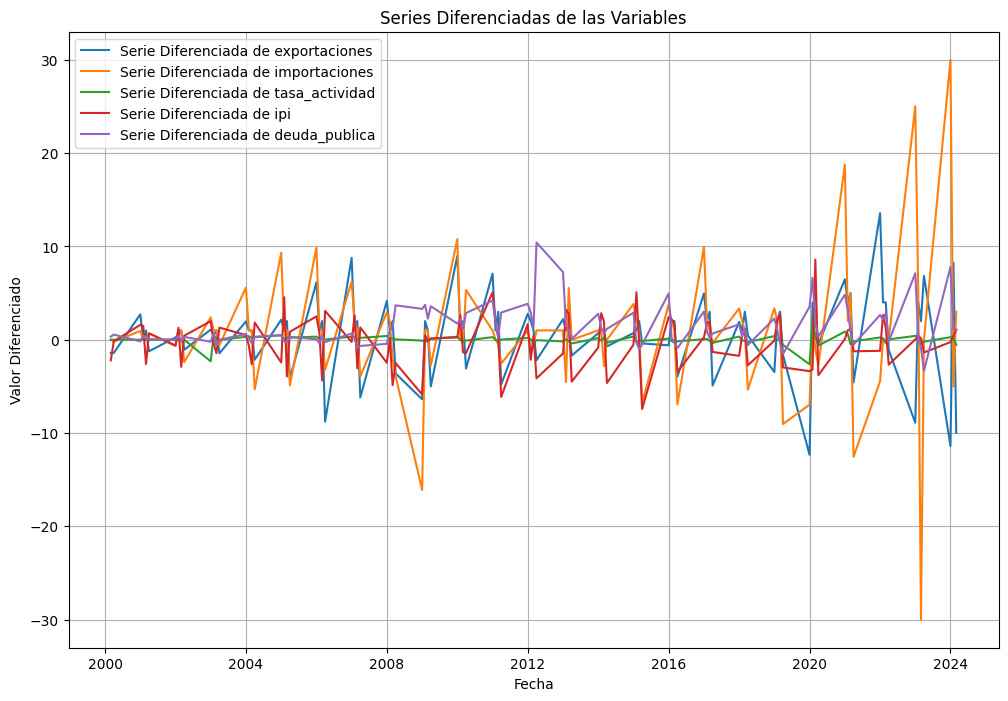

In [733]:
df['fecha'] = pd.to_datetime(df['trimestres'])
df.set_index('fecha', inplace=True)

# Lista de variables
variables = ['exportaciones', 'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica']


# Crear una figura con un tamaño adecuado
plt.figure(figsize=(12, 8))

# Iterar sobre las variables y graficar cada serie diferenciada
for var in variables:
    plt.plot(df[f'{var}_diff'], label=f'Serie Diferenciada de {var}')

# Añadir título y etiquetas
plt.title('Series Diferenciadas de las Variables')
plt.xlabel('Fecha')
plt.ylabel('Valor Diferenciado')
plt.grid(True)

# Añadir leyenda para identificar las series
plt.legend()

# Mostrar el gráfico
plt.show()


Aplicando una diferencia para cada una, hemos conseguido que todas las variables sean estacionarias.

Ahora, podríamos aplicar:
-  Un modelo VAR para capturar relaciones dinámicas entre ellas.
- Una regresión lineal sobre series diferenciadas, que explicará cambios y no valores absolutos y solamente si los residuos no muestran autocorrelación.

- Si la mostrasen, no se recomienda la aplicación de una regresión lineal y sería más util un ARIMAX. Más adelante lo veremos.

In [734]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Seleccionar las columnas adecuadas
X = df[['trimestres', 'españa', 'turismo_internacional', 'exportaciones',
        'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica',
        'españa_diff', 'turismo_seasonal_diff', 'turismo_dummy',
        'exportaciones_diff', 'importaciones_diff', 'tasa_actividad_diff',
        'ipi_diff', 'deuda_publica_diff']]

# Asegurarse de que todas las columnas son numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores NaN (si es necesario)
X = X.dropna()

# Agregar constante (intercepto) para el cálculo del VIF
X = add_constant(X)

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados
print(vif)


                 Variable         VIF
0                   const    0.000000
1              trimestres  180.021843
2                  españa    3.492683
3   turismo_internacional    1.139902
4           exportaciones    3.282670
5           importaciones    3.669736
6          tasa_actividad    0.015466
7                     ipi    0.281053
8           deuda_publica    2.176067
9             españa_diff    1.000022
10  turismo_seasonal_diff    1.001784
11          turismo_dummy    1.114458
12     exportaciones_diff    1.001216
13     importaciones_diff    1.001186
14    tasa_actividad_diff    0.999898
15               ipi_diff    0.998893
16     deuda_publica_diff    1.038143


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


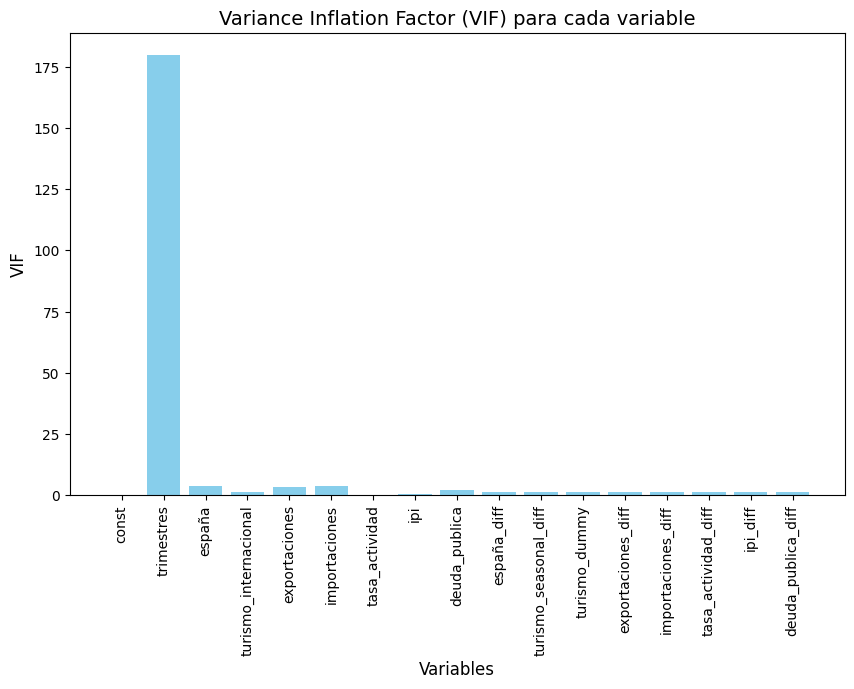

In [735]:
import matplotlib.pyplot as plt

# Asumiendo que ya tienes el DataFrame 'vif' con los valores de VIF calculados
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(vif['Variable'], vif['VIF'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Variance Inflation Factor (VIF) para cada variable', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('VIF', fontsize=12)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()


Mediante el factor de inflación de la varianza, se analiza la multicolinealidad, fundamental para que las estimaciones de los coeficientes del modelo ARIMAX o de regresión, no sean inestables. Como podemos observar, en las columnas sin limpiar, los valores del VIF son elevadísimos, cuando es recomendable que se mantenga por debako de 10, o incluso 5 para asegurar que no haya problemas significativos de colinealidad. Desdee españa_diff (8) hasta deuda_publica_diff, los valores se mantienen entre por debajo de 2.

NO SE SI BORRAR EL RESTO DE VARIABLES

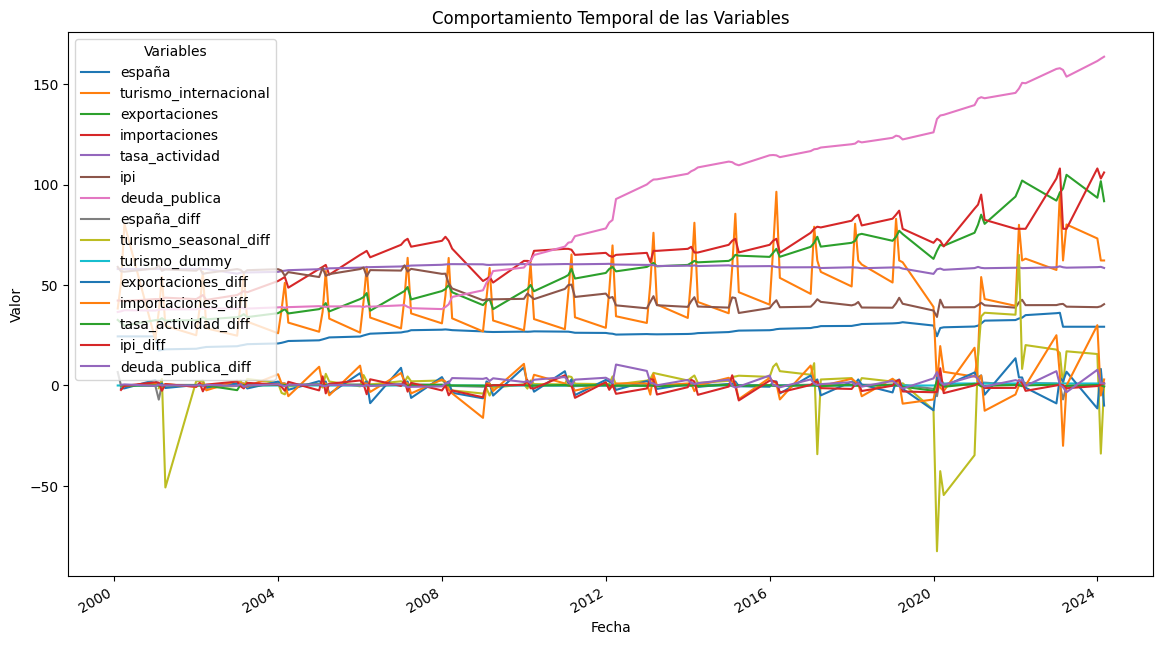

In [736]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'trimestres' sea de tipo datetime o un formato adecuado para el eje X
df['trimestres'] = pd.to_datetime(df['trimestres'], errors='coerce')

# Establecer 'trimestres' como índice (si aún no lo está)
df.set_index('trimestres', inplace=True)

# Graficar todas las variables en función del tiempo
df.plot(figsize=(14, 8))

# Configuración del gráfico
plt.title('Comportamiento Temporal de las Variables')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend(title='Variables')

# Mostrar el gráfico
plt.show()


In [737]:
print(df.columns.tolist())

['españa', 'turismo_internacional', 'exportaciones', 'importaciones', 'tasa_actividad', 'ipi', 'deuda_publica', 'españa_diff', 'turismo_seasonal_diff', 'turismo_dummy', 'exportaciones_diff', 'importaciones_diff', 'tasa_actividad_diff', 'ipi_diff', 'deuda_publica_diff']


In [738]:

# Cargar la base de datos original
df_original = pd.read_excel('/content/tfg.xlsx')

# Resetear el índice por si alguna transformación previa lo afectó
df_original = df_original.reset_index(drop=True)
df = df.reset_index(drop=True)

# Asegurar que df tiene la columna "trimestres" y ajustar tamaños
if "trimestres" in df_original.columns:
    df["trimestres"] = df_original.loc[df.index, "trimestres"].values  # Asegurar correspondencia de índices
else:
    print("Error: 'trimestres' no está en df_original")

# Filtrar solo las columnas que terminan en '_diff' o '_dummy', además de 'trimestres'
df = df[[col for col in df.columns if col.endswith('_diff') or col.endswith('_dummy') or col == 'trimestres']]

# Verificar que "trimestres" está en el DataFrame antes de guardar
print("Columnas finales en df:", df.columns)

# Guardar y descargar el archivo
ruta_archivo = '/content/tfg_limpia.xlsx'
df.to_excel(ruta_archivo, index=False)
files.download(ruta_archivo)

print("Archivo descargado correctamente.")


Columnas finales en df: Index(['españa_diff', 'turismo_seasonal_diff', 'turismo_dummy',
       'exportaciones_diff', 'importaciones_diff', 'tasa_actividad_diff',
       'ipi_diff', 'deuda_publica_diff', 'trimestres'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo descargado correctamente.
